In [149]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [150]:
df = pd.read_csv('../datasets/cleanedfix_banget.csv')

In [151]:
df.iloc[:,0:5]

,Time,Age_band_of_driver,Sex_of_driver,Vehicle_driver_relation,Driving_experience
0,17:00:00,18-30,Male,Employee,1-2yr
1,17:00:00,31-50,Male,Employee,Above 10yr
2,17:00:00,18-30,Male,Employee,1-2yr
3,01:00:00,18-30,Male,Employee,5-10yr
4,01:00:00,18-30,Male,Employee,2-5yr
...,...,...,...,...,...
12311,16:00:00,31-50,Male,Employee,2-5yr
12312,18:00:00,Unknown,Male,Employee,5-10yr
12313,13:00:00,Over 51,Male,Employee,5-10yr
12314,13:00:00,18-30,Female,Employee,Above 10yr


In [152]:
df.iloc[:,5:10]

,Type_of_vehicle,Owner_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment
0,Private Vehicle,Owner,Residential areas,Two-way (divided with broken lines road marking),Tangent road with flat terrain
1,Public Transport,Owner,Office areas,Undivided Two way,Tangent road with flat terrain
2,Commercial Vehicle,Owner,Recreational areas,other,Tangent road with flat terrain
3,Public Transport,Governmental,Office areas,other,Tangent road with mild grade and flat terrain
4,Private Vehicle,Owner,Industrial areas,other,Tangent road with flat terrain
...,...,...,...,...,...
12311,Commercial Vehicle,Owner,Outside rural areas,Undivided Two way,Tangent road with flat terrain
12312,Private Vehicle,Owner,Outside rural areas,Two-way (divided with broken lines road marking),Escarpments
12313,Public Transport,Owner,Outside rural areas,Two-way (divided with broken lines road marking),Tangent road with mountainous terrain and
12314,Commercial Vehicle,Owner,Office areas,Undivided Two way,Tangent road with mountainous terrain and


In [153]:
df.iloc[:,10:15]

,Types_of_Junction,Road_surface_type,Road_surface_conditions,Light_conditions,Weather_conditions
0,No junction,Asphalt roads,Dry,Daylight,Normal
1,No junction,Asphalt roads,Dry,Daylight,Normal
2,No junction,Asphalt roads,Dry,Daylight,Normal
3,Y Shape,Earth roads,Dry,Darkness - lights lit,Normal
4,Y Shape,Asphalt roads,Dry,Darkness - lights lit,Normal
...,...,...,...,...,...
12311,No junction,Asphalt roads,Dry,Daylight,Normal
12312,No junction,Asphalt roads,Dry,Daylight,Normal
12313,No junction,Asphalt roads,Dry,Daylight,Normal
12314,No junction,Asphalt roads,Dry,Darkness - lights lit,Normal


In [154]:
df.iloc[:,15:20]

,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_severity
0,Stationary Object Collision,2,2,Moving forward,na
1,Vehicle Collision,2,2,Moving forward,na
2,Stationary Object Collision,2,2,Moving forward,3
3,Vehicle Collision,2,2,Moving forward,3
4,Vehicle Collision,2,2,Moving forward,na
...,...,...,...,...,...
12311,Vehicle Collision,2,1,Moving forward,na
12312,Vehicle Collision,2,1,Other,na
12313,Vehicle Collision,1,1,Other,3
12314,Vehicle Collision,2,1,Other,na


# Kemenhub RI, Jasa Marga, PUTR, Operator Jalan

- Area occured with accident severity
- Day of week with accident severity and time
- Type of Juction with number of casualties
- LIght conditions and type of junctions
- Types of colission and type of junction and accident severity
- Road surface type with accident severity

# Aplikasi Navigasi, BMKG, gps

- Weather Conditions, time, days of week
- Time, accident severity
- Road surface conditions, Accident severity
- Road surface type, weather conditions, accident severity



In [168]:
pivot_df = df.groupby(['Weather_conditions', 'Day']).size().unstack(fill_value=0)
print(pivot_df)

Day                 Friday  Monday  Saturday  Sunday  Thursday  Tuesday  \
Weather_conditions                                                        
Cloudy                  13      23        18       5        23       21   
Fog or mist              0       4         0       0         4        2   
Normal                1698    1300      1375    1230      1513     1497   
Other                   36      45        36      21        63       46   
Raining                219     230       164     154       184      156   
Raining and Windy        0      16         1      14         0        2   
Snow                     5       5        20      11         8        9   
Unknown                 59      47        37      24        44       21   
Windy                   11      11        15       8        12       16   

Day                 Wednesday  
Weather_conditions             
Cloudy                     22  
Fog or mist                 0  
Normal                   1450  
Other         

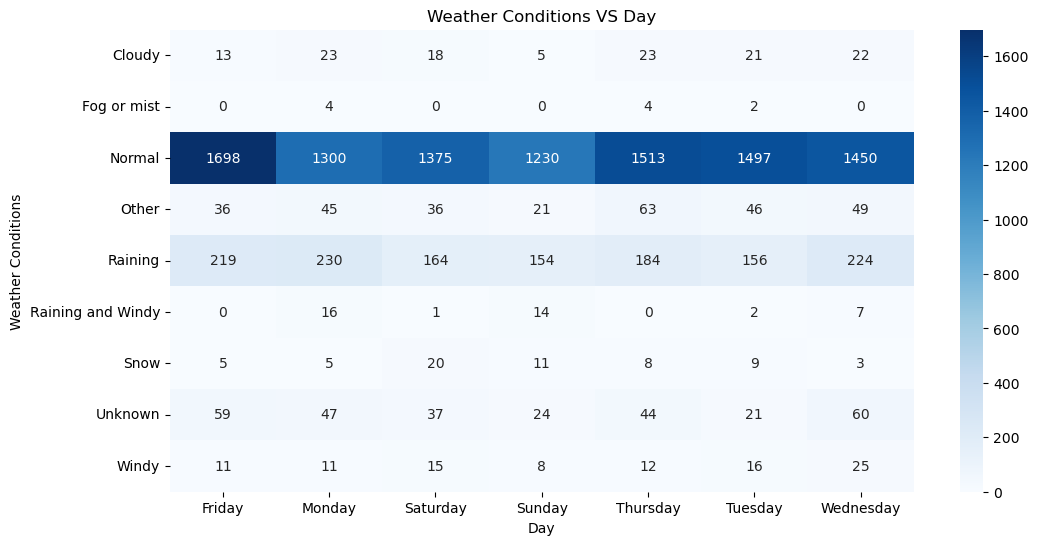

In [169]:
plt.figure(figsize=(12, 6))
sns.heatmap(pd.crosstab(df["Weather_conditions"], df["Day"]), cmap="Blues", annot=True, fmt="d")
plt.title("Weather Conditions VS Day")
plt.xlabel("Day")
plt.ylabel("Weather Conditions")
plt.xticks(rotation=0)
plt.show()


In [155]:
pivot_df = df.groupby(['Time', 'Accident_severity']).size().unstack(fill_value=0)
print(pivot_df)

Accident_severity  Fatal injury  Serious Injury  Slight Injury
Time                                                          
00:00:00                      5              38            163
01:00:00                      4              17            113
02:00:00                      1              13             70
03:00:00                      6              22             56
04:00:00                      1               9             81
05:00:00                      0              20             56
06:00:00                      4              32            178
07:00:00                      1              77            454
08:00:00                      2             108            718
09:00:00                      6              78            475
10:00:00                      0              52            448
11:00:00                     12              80            511
12:00:00                      5              88            598
13:00:00                      7             108        

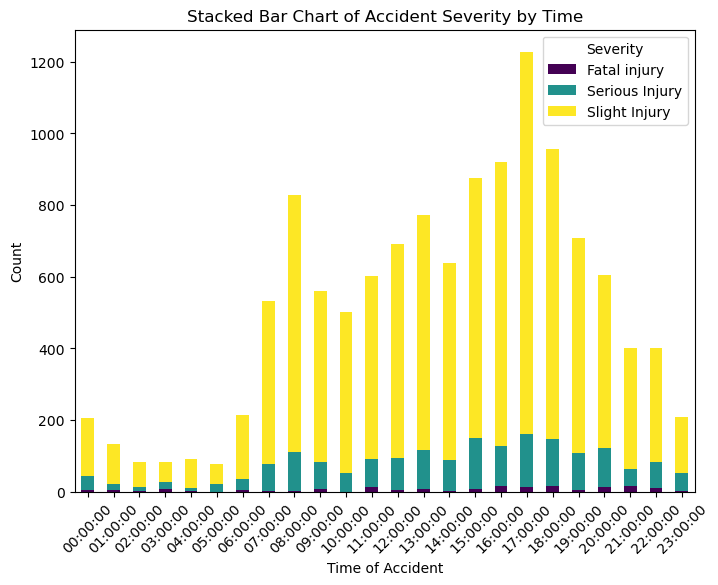

In [156]:
df_counts = df.groupby(['Time', 'Accident_severity']).size().unstack()
df_counts.plot(kind='bar', stacked=True, colormap='viridis', figsize=(8, 6))
plt.xlabel('Time of Accident')
plt.ylabel('Count')
plt.title('Stacked Bar Chart of Accident Severity by Time')
plt.legend(title='Severity')
plt.xticks(rotation=45)
plt.show()


# Asuransi dan Rental Mobil

- Sex of driver accident severity
- Age of band accident severity (dataset yang belum di prerpo)
- Type of vehicle with accident severity
- Type of vehicle, owner of vehicle, accident severity

In [157]:
pivot_df = df.groupby(['Sex_of_driver', 'Accident_severity']).size().unstack(fill_value=0)
print(pivot_df)

Accident_severity  Fatal injury  Serious Injury  Slight Injury
Sex_of_driver                                                 
Female                        5             104            592
Male                        152            1621           9664
Unknown                       1              18            159


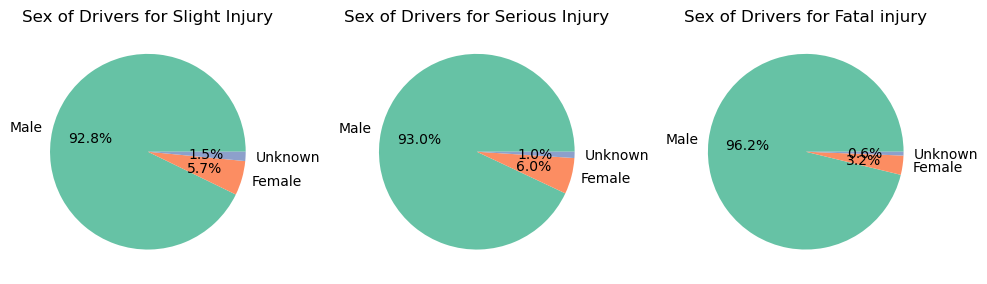

In [ ]:
accident_severity_categories = df['Accident_severity'].unique()

fig, axes = plt.subplots(1, len(accident_severity_categories), figsize=(10, 5))

if len(accident_severity_categories) == 1:
    axes = [axes]

for i, severity in enumerate(accident_severity_categories):
    subset = df[df['Accident_severity'] == severity] 
    sex_count = subset['Sex_of_driver'].value_counts() 
    
    axes[i].pie(sex_count, labels=sex_count.index, autopct='%1.1f%%', colors=plt.cm.Set2.colors)
    axes[i].set_title(f'Sex of Drivers for {severity}')

plt.tight_layout()
plt.show()

In [159]:
pivot_df = df.groupby(['Age_band_of_driver', 'Accident_severity']).size().unstack(fill_value=0)
print(pivot_df)

Accident_severity   Fatal injury  Serious Injury  Slight Injury
Age_band_of_driver                                             
18-30                         62             604           3605
31-50                         54             541           3492
Over 51                       24             257           1304
Under 18                      12             169            644
Unknown                        6             172           1370


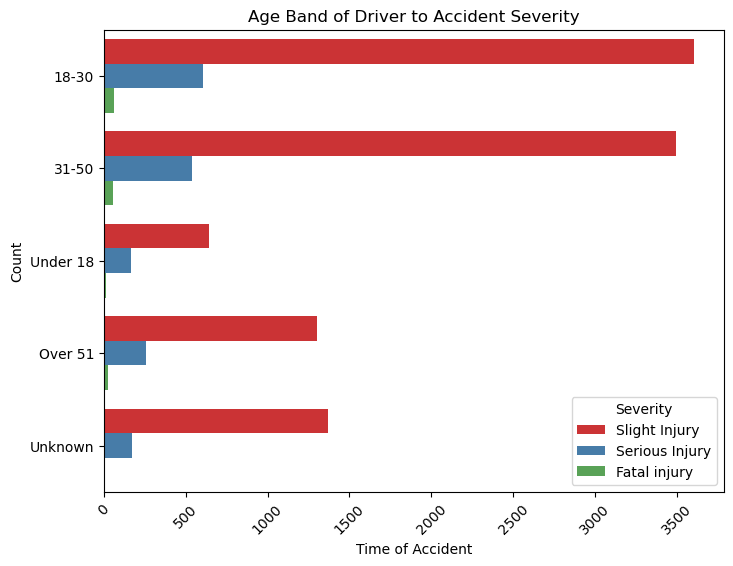

In [160]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, y='Age_band_of_driver', hue='Accident_severity', palette='Set1')
plt.xlabel('Time of Accident')  
plt.ylabel('Count')
plt.title('Age Band of Driver to Accident Severity')
plt.legend(title='Severity')
plt.xticks(rotation=45)
plt.show()

In [161]:
pivot_df = df.groupby(['Type_of_vehicle', 'Owner_of_vehicle']).size().unstack(fill_value=0)
print(pivot_df)

Owner_of_vehicle    Governmental  Organization  Other  Owner
Type_of_vehicle                                             
Commercial Vehicle           322            80      8   3511
Non-Motorized                  7             1      0     89
Other                        105            39      0   1064
Private Vehicle              397           129     10   4483
Public Transport             197            61      4   1679
Special Vehicle               13             2      0    115


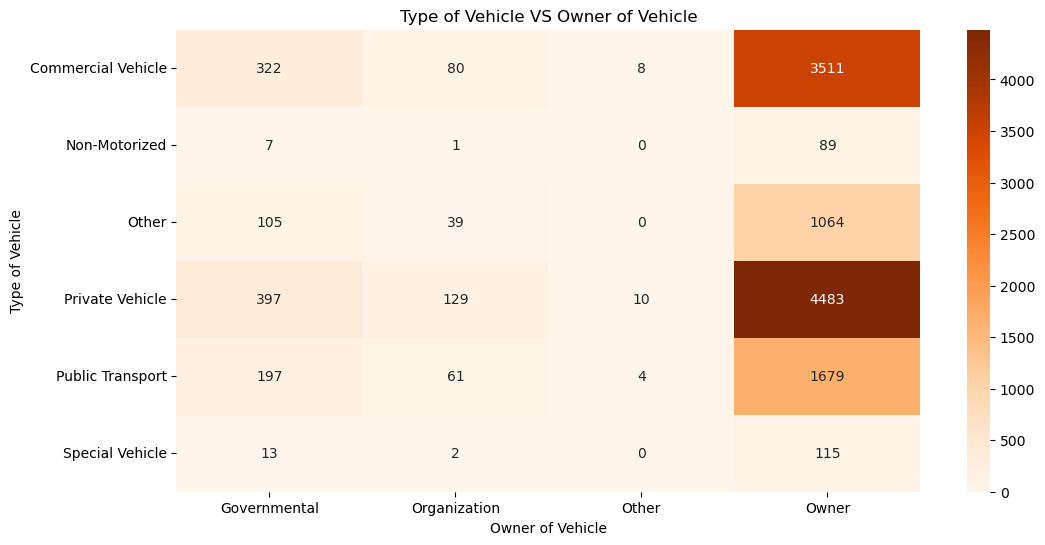

In [162]:
plt.figure(figsize=(12, 6))
sns.heatmap(pd.crosstab(df["Type_of_vehicle"], df["Owner_of_vehicle"]), cmap="Oranges", annot=True, fmt="d")
plt.title("Type of Vehicle VS Owner of Vehicle")
plt.xlabel("Owner of Vehicle")
plt.ylabel("Type of Vehicle")
plt.xticks(rotation=0)
plt.show()


In [167]:
pivot_df = df.groupby(['Type_of_vehicle', 'Accident_severity']).size().unstack(fill_value=0)
print(pivot_df)

Accident_severity   Fatal injury  Serious Injury  Slight Injury
Type_of_vehicle                                                
Commercial Vehicle            52             578           3291
Non-Motorized                  0              12             85
Other                         16             138           1054
Private Vehicle               62             716           4241
Public Transport              27             274           1640
Special Vehicle                1              25            104


<Figure size 1600x1000 with 0 Axes>

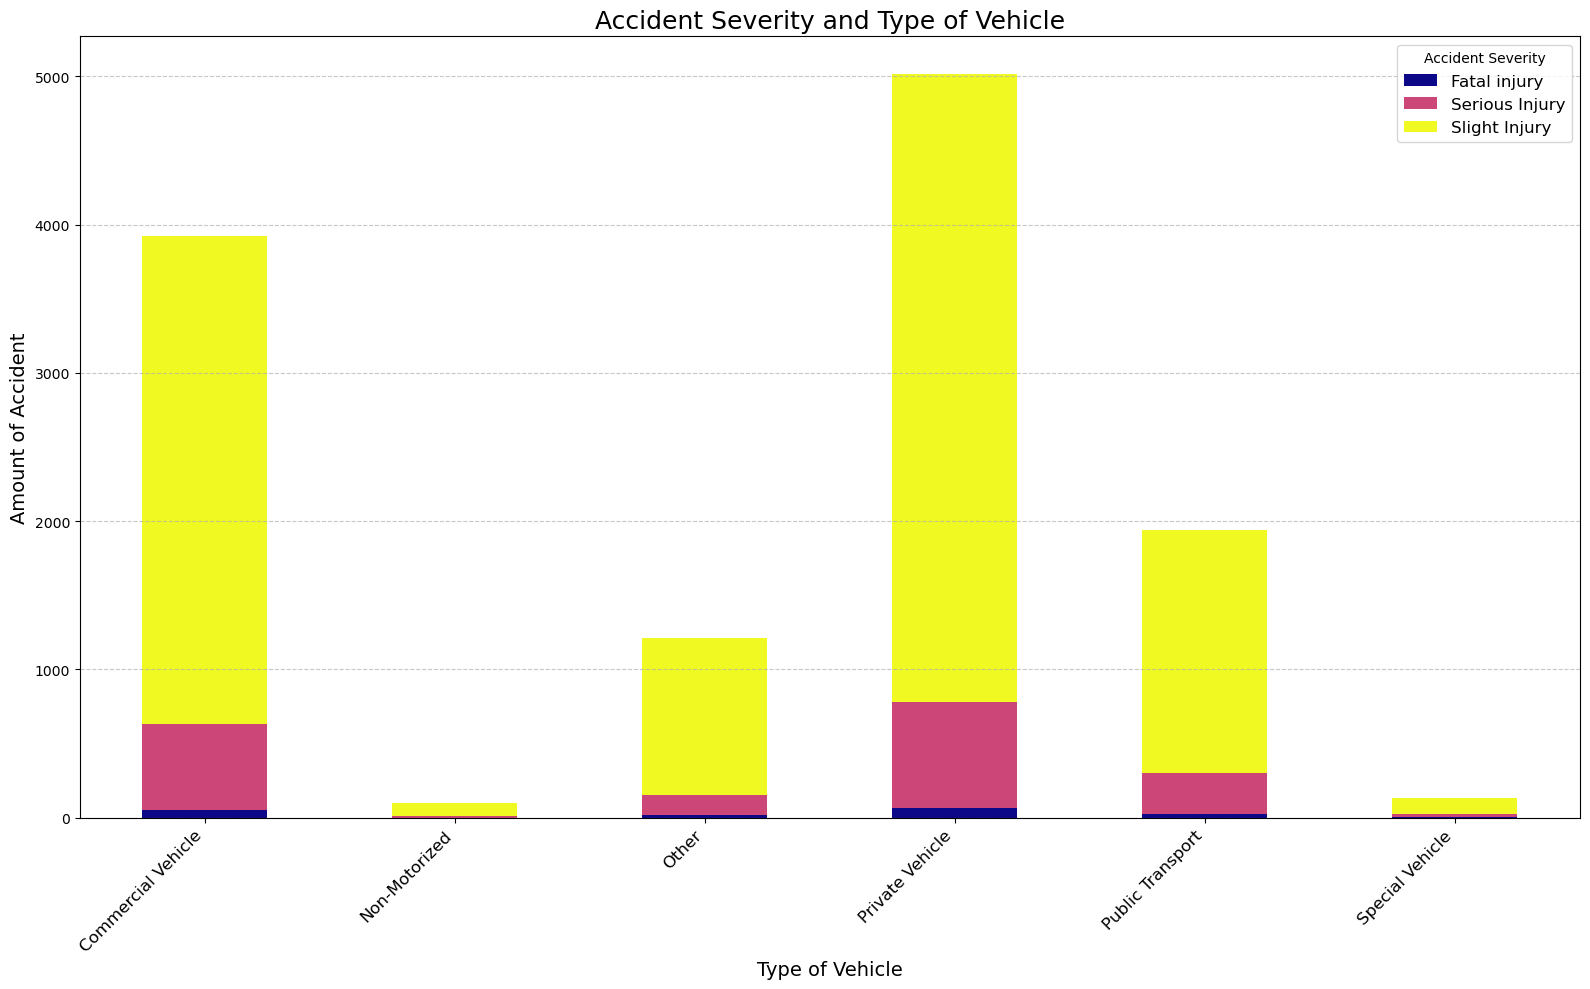

In [ ]:
if 'Accident_severity' in df.columns and 'Type_of_vehicle' in df.columns:
    light_junction = df.groupby(['Type_of_vehicle', 'Accident_severity']).size().unstack(fill_value=0)

    plt.figure(figsize=(16, 10)) 
    ax = light_junction.plot(kind='bar', stacked=True, colormap='plasma', figsize=(16, 10))

    plt.title('Accident Severity and Type of Vehicle', fontsize=18)
    plt.xlabel('Type of Vehicle', fontsize=14)
    plt.ylabel('Amount of Accident', fontsize=14)
    plt.legend(title='Accident Severity', fontsize=12)
    plt.xticks(rotation=45, ha='right', fontsize=12) 

    plt.grid(axis='y', linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()
else:
    print("Kolom 'Accident_severity' atau 'Type_of_vehicle' tidak ditemukan dalam dataset.")

# Media 
- Time, wather, days of week
- Number of casualties, number of vehicle involved, accident severity